In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 


#from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.decomposition import PCA


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
#import xgboost as xgb
from xgboost import XGBRegressor


plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

# Over View And Loading Data

In [2]:
df = pd.read_csv(r"E:\\documents\Coding\Data\kc_house_data\kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df2 =df.copy()

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.shape

(21613, 21)

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# OverView Of Each Columns 

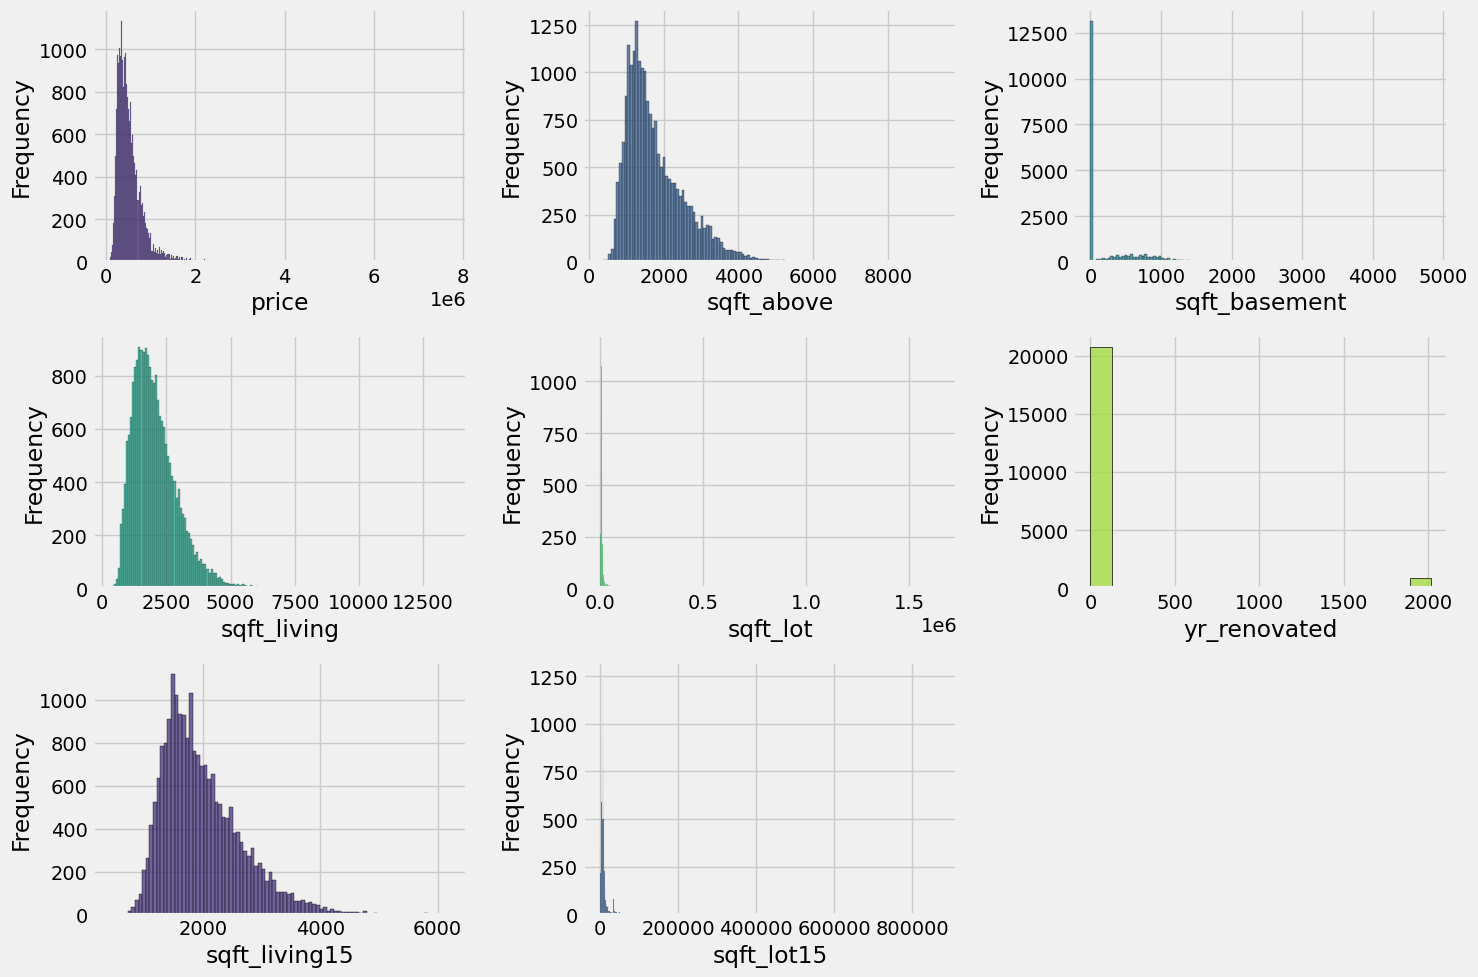

In [9]:
distribution_col = ['price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

# color palette
palette = sns.color_palette("viridis")
plt.figure(figsize=(15, 10))

for i, col in enumerate(distribution_col):
    plt.subplot(3,3, i+1)
    sns.histplot(x=df[col], color=palette[i % len(palette)], edgecolor='k')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Log Price')

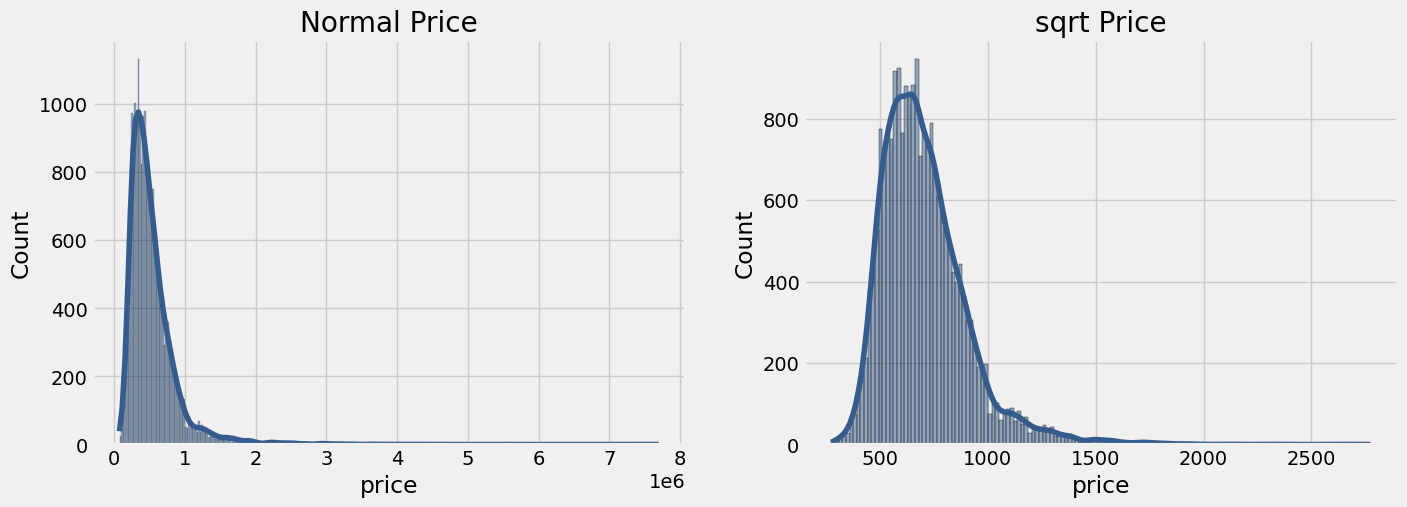

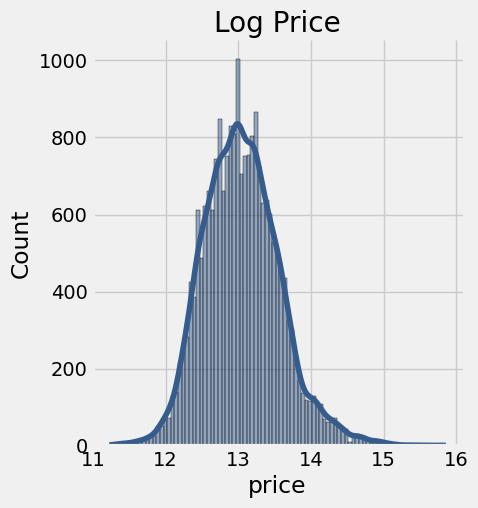

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(df['price'], kde=True, color=palette[i % len(palette)], edgecolor='k')
plt.title('Normal Price')

#plt.figure(figsize=(8,5))
plt.subplot(122)
sns.histplot(np.sqrt(df['price']), kde=True, color=palette[i % len(palette)], edgecolor='k')
plt.title('sqrt Price')

plt.subplot(122)
sns.displot(np.log(df['price']), kde=True, color=palette[i % len(palette)], edgecolor='k')
plt.title('Log Price')

In [11]:
df[df['sqft_lot']> 200000].shape[0]

259

In [12]:
# Let's see what's wrong with sqft_lot

sqft_lotoutliears = df[df['sqft_lot']> 200000].shape[0]
sqft_lot15_lotoutliears = df[df['sqft_lot15']> 200000].shape[0]
sqft_basement_lotoutliears = df[(df['sqft_basement'] == 0) | (df['sqft_basement'] > 2000)].shape[0]
yr_renovated_lotoutliears = df[df['yr_renovated']> 200000].shape[0]

#print(f'The number of zero in yr_renovated: {yr_renovated_lotoutliears}')
print(f'The outliars in sqft_basement: {sqft_basement_lotoutliears}')
print(f'The outliars in sqft_lot15: {sqft_lot15_lotoutliears}')
print(f'The outliars in sqft_lot: {sqft_lotoutliears}')

The outliars in sqft_basement: 13203
The outliars in sqft_lot15: 169
The outliars in sqft_lot: 259


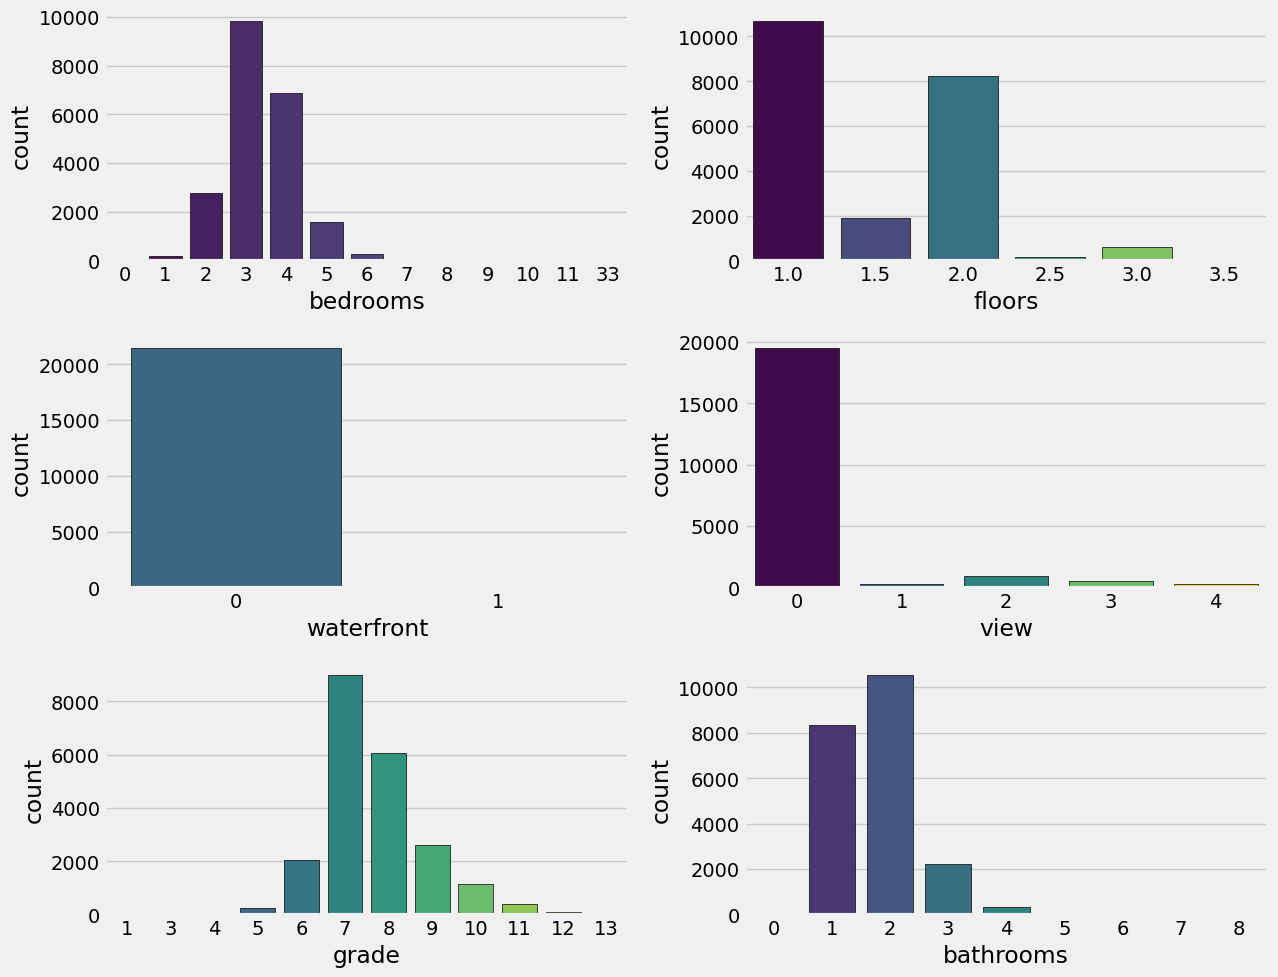

In [13]:
df['bathrooms'] = df['bathrooms'].astype(int)

cat_col = ['bedrooms', 'floors', 'waterfront', 'view', 'grade', 'bathrooms']

plt.figure(figsize=(13, 10))
for i, col in enumerate(cat_col):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=col, hue=col, palette='viridis', edgecolor='k', legend=False)
plt.tight_layout()
plt.show()

# Exploratory Data Anlysis

The Corelation between grade and price: 0.667434256020237
The Corelation between view and price: 0.3972934882945043
The Corelation between sqft_living and price: 0.667434256020237


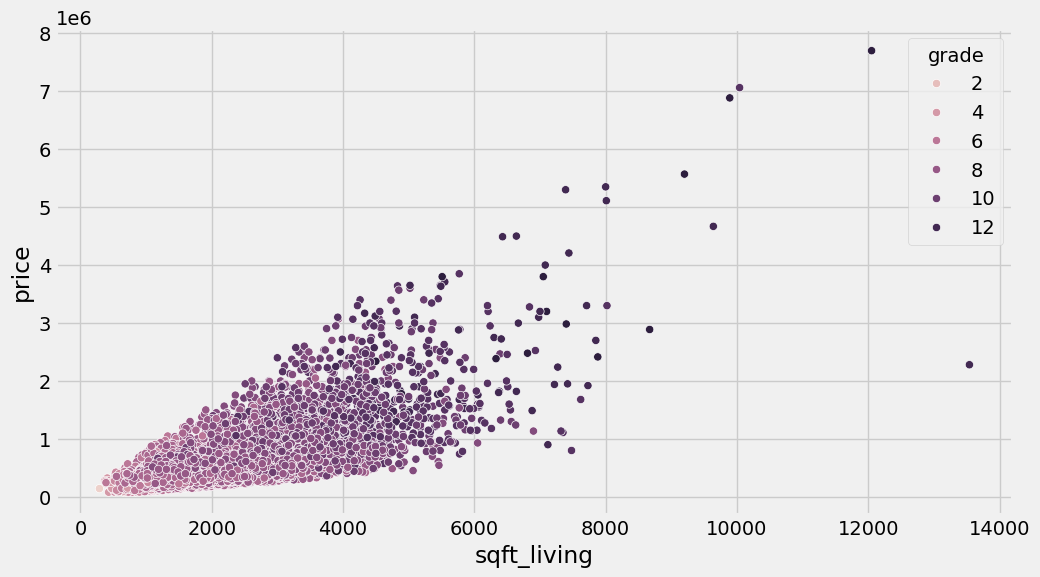

In [14]:
sqft_corr = df['sqft_living'].corr(df['price'])
view_price_corr = df['view'].corr(df['price'])
sqft_corr = df['grade'].corr(df['price'])

print(f'The Corelation between grade and price: {sqft_corr}')
print(f'The Corelation between view and price: {view_price_corr}')
print(f'The Corelation between sqft_living and price: {sqft_corr}')

plt.figure(figsize=(11, 6))
sns.scatterplot(x= 'sqft_living', y='price', data= df, hue = 'grade')
#plt.legend(labels=['Yes', 'No'])
plt.show()

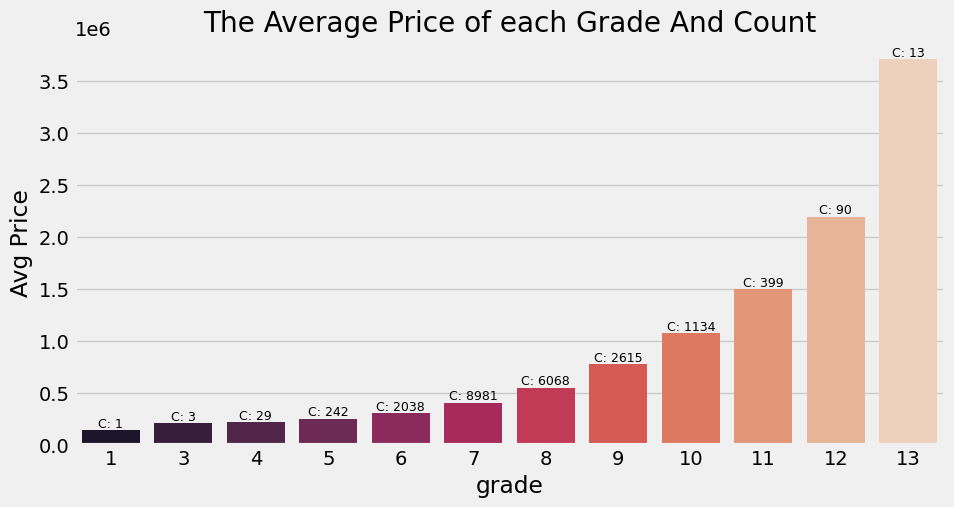

In [15]:
# The avg price of each grade and number of values in each grade 
plt.figure(figsize=(10, 5))

GrdAvg_price = df.groupby('grade')['price'].agg(['mean', 'count'])

sns.barplot(x = GrdAvg_price.index, y= GrdAvg_price['mean'], palette= 'rocket')

for i, (mean, count) in enumerate(zip(GrdAvg_price['mean'], GrdAvg_price['count'])):
    plt.text(i, count + mean, f'C: {count}', ha='center', va='bottom', size=9)

plt.ylabel('Avg Price')
plt.title('The Average Price of each Grade And Count')
plt.show()

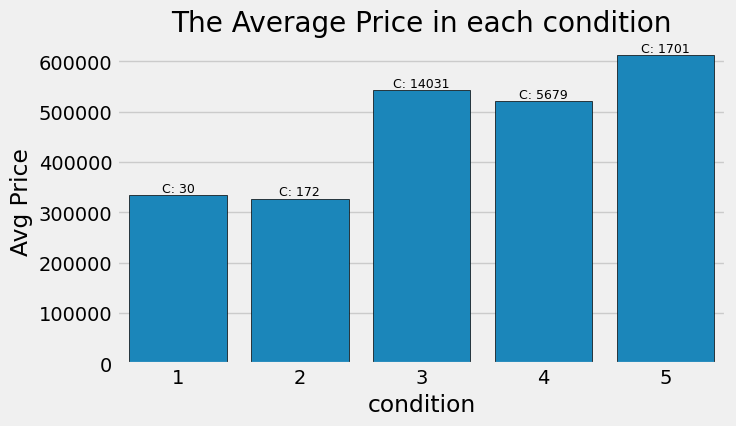

In [16]:
plt.figure(figsize=(7, 4))

conditionAvg_price = df.groupby('condition')['price'].agg(['mean', 'count'])

sns.barplot(x=conditionAvg_price.index, y=conditionAvg_price['mean'], edgecolor='k')  # No palette here

for i, (mean, count) in enumerate(zip(conditionAvg_price['mean'], conditionAvg_price['count'])):
    plt.text(i, mean, f'C: {count}', ha='center', va='bottom', size=9)

plt.ylabel('Avg Price')
plt.title('The Average Price in each condition')
plt.show()


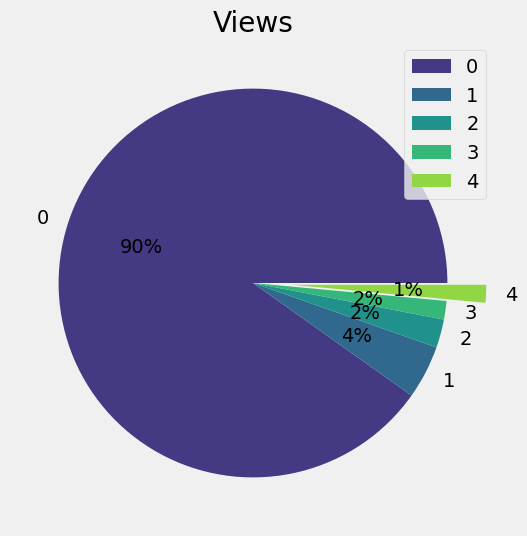

In [17]:
# Labels 
labels = ['0', '1', '2', '3', '4']
count = df['view'].value_counts()

palette = sns.color_palette("viridis", len(labels))  

plt.figure(figsize=(6, 6))
plt.pie(count, labels=labels, autopct='%.0f%%', explode=(0, 0, 0, 0, 0.2), colors=palette)
plt.legend(labels, loc='upper right')  # Adjust legend labels 
plt.title('Views')
plt.show()

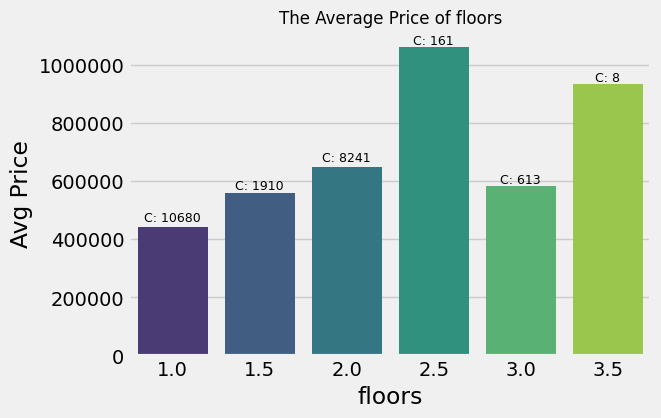

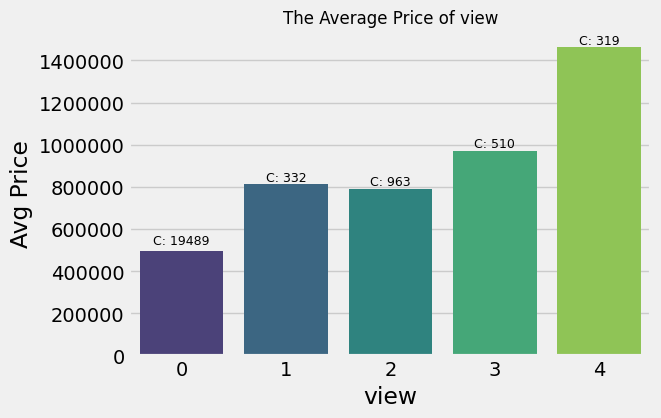

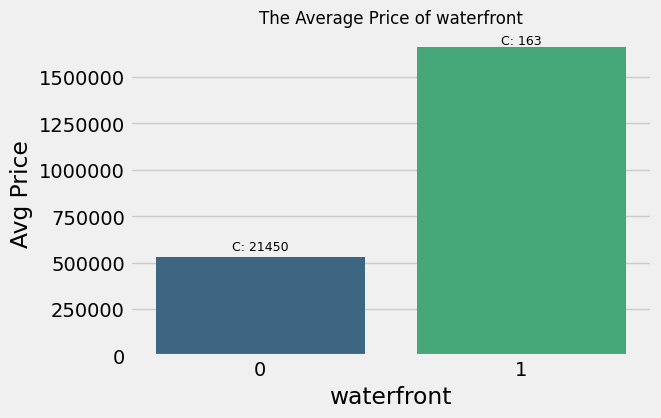

In [18]:
mean_count = ['floors', 'view', 'waterfront']

for i, col in enumerate(mean_count):
    plt.figure(figsize=(6, 4))
    GrdAvg_price = df.groupby(col)['price'].agg(['mean', 'count'])
    GrdAvg_price = GrdAvg_price#.sort_values(by = 'mean', ascending=False)#.reset_index(drop=True)
    
    sns.barplot(x = GrdAvg_price.index, y= GrdAvg_price['mean'], palette= 'viridis')
    
    for i, (mean, count) in enumerate(zip(GrdAvg_price['mean'], GrdAvg_price['count'])):
        plt.text(i, count + mean, f'C: {count}', ha='center', va='bottom', size=9)

    plt.ticklabel_format(style='plain', axis='y')
    plt.ylabel('Avg Price')
    plt.xlabel(col)
    plt.title(f'The Average Price of {col}', size=12)
    plt.show()

### Checking for outliars

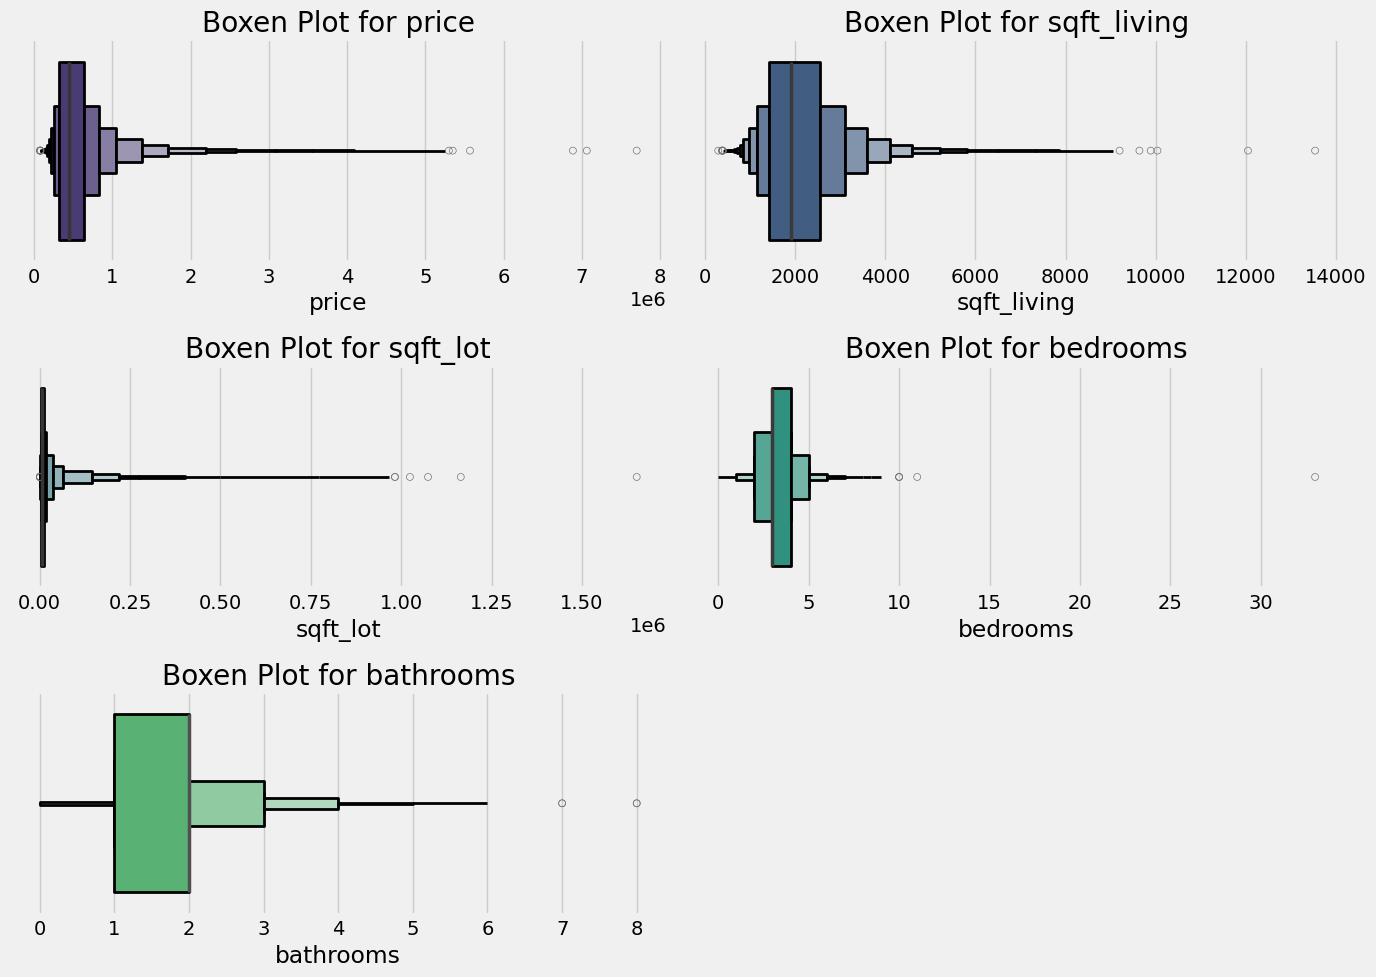

In [19]:
checking_outliers = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']

# Define a color palette
palette = sns.color_palette("viridis")

plt.figure(figsize=(14, 10))
for i, col in enumerate(checking_outliers):
    plt.subplot(3, 2, i + 1)  # Adjust subplot arrangement to fit within figure size
    sns.boxenplot(x=col, data=df, edgecolor='k', color=palette[i % len(palette)])
    plt.title(f'Boxen Plot for {col}')

# Adjust layout
plt.tight_layout()
plt.show()

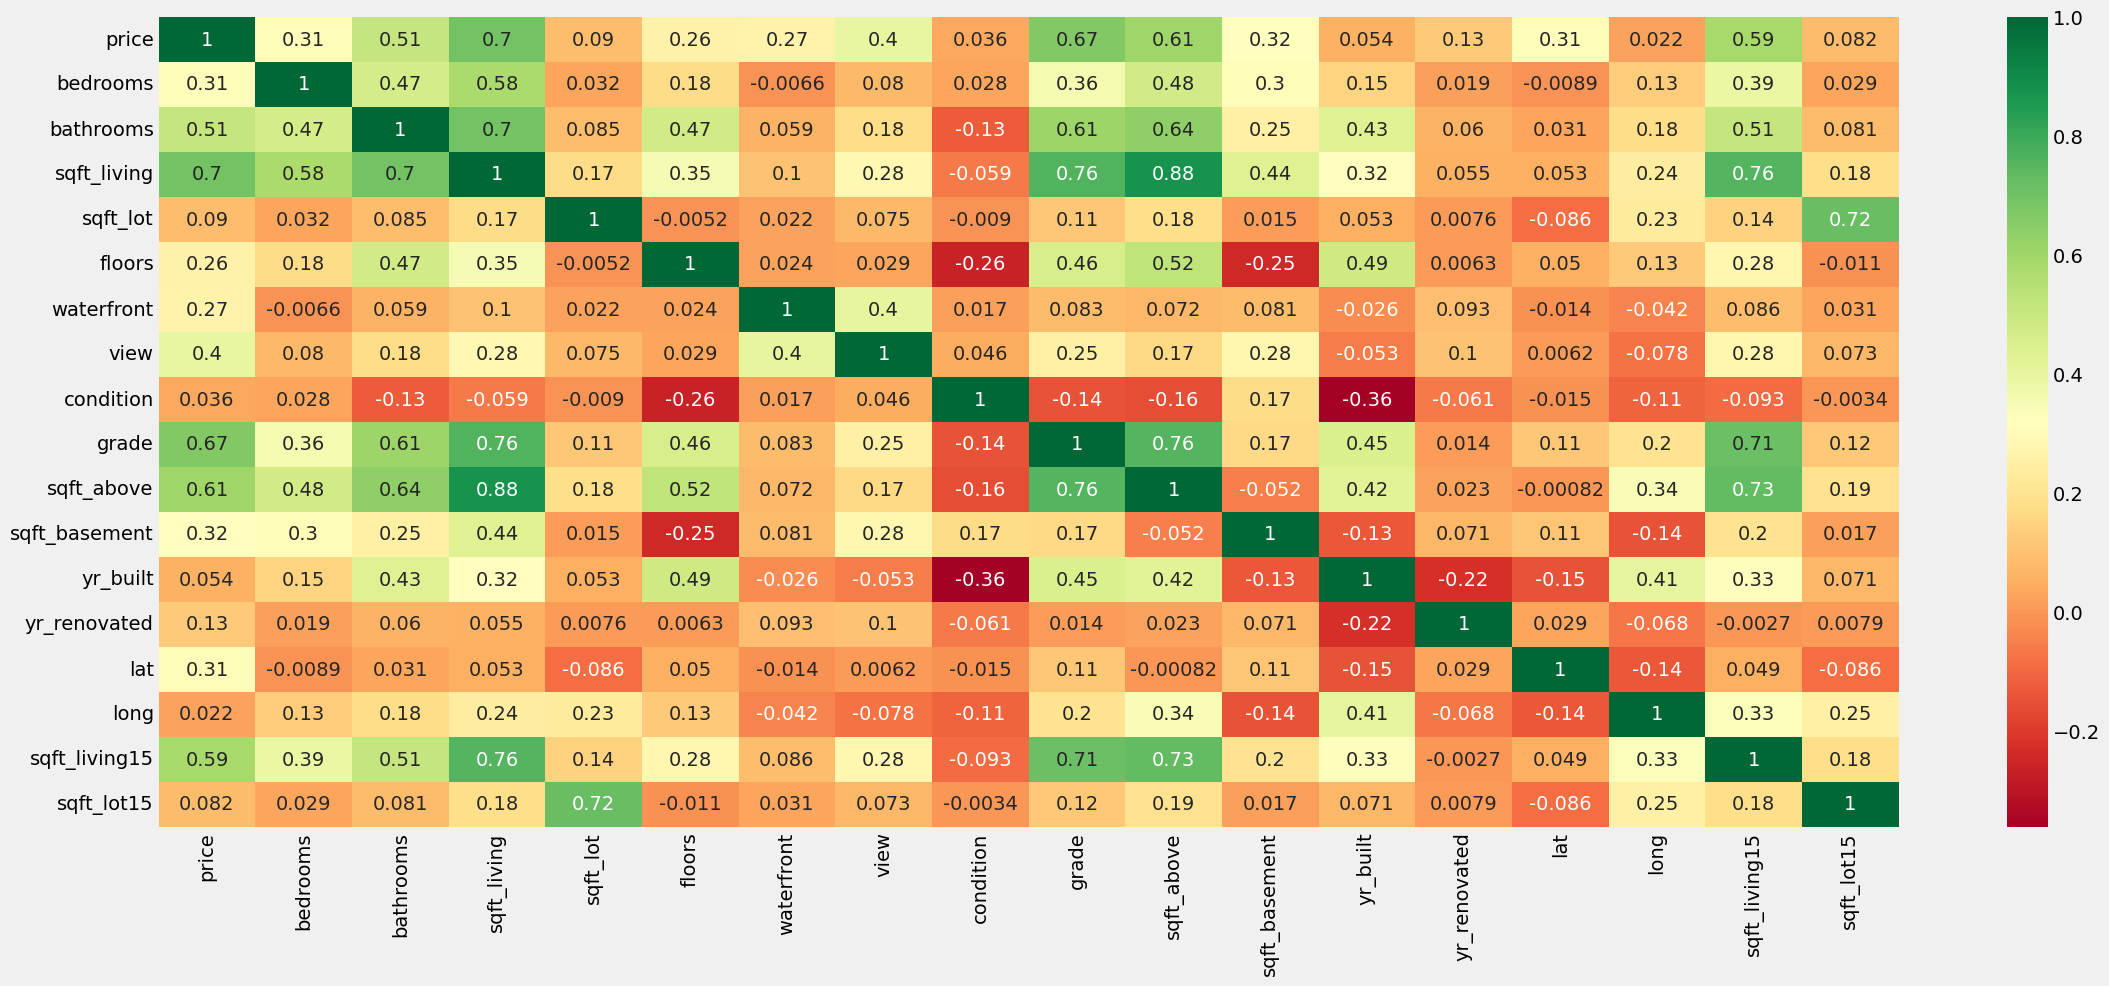

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.510072
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
Name: price, dtype: float64


In [20]:
# Select numeric columns excluding specified columns
numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32']).drop(columns=['id', 'zipcode'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")
plt.show()

# Get correlation of each feature with the target variable
target_corr = corr_matrix['price'].sort_values(ascending=False)
print(target_corr)

In [21]:
df.shape

(21613, 21)

<Axes: xlabel='sqft_lot', ylabel='price'>

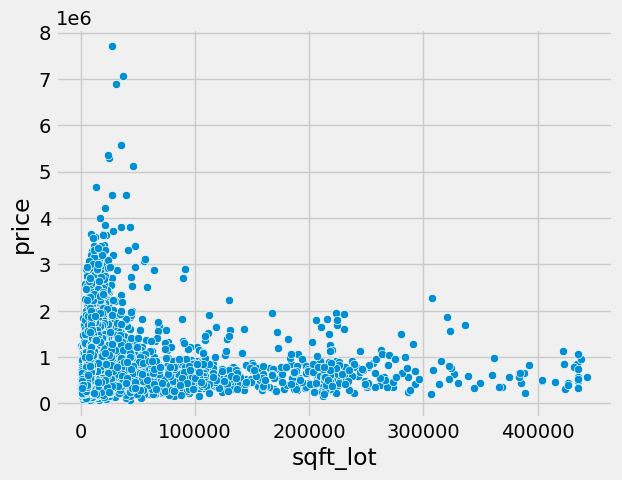

In [22]:
fgg= df[df['sqft_lot'] < 450000]
sns.scatterplot(y='price', x='sqft_lot', data=fgg)

In [23]:
df= df[df['sqft_lot'] < 450000]

# Inspection of data

In [24]:
df2 = df.copy()

#### Droping Values

In [25]:
df2 = df2[df2['price'] <= 10000000]
df2 = df2[df2['bedrooms']<10]
df2 = df2[df2['sqft_living']<12000]
df2 = df2[df2['sqft_lot']<1000000]

In [26]:
df2 = df2.drop(df2[(df2['bathrooms'] >= 7) & (df2['price'] < 500000)].index)

In [27]:
df2 = df2.drop(df2[(df2['bathrooms'] < 2 ) & (df2['grade'] == 11)].index)

#### Replacing Values

In [28]:
# Replacing values 
df2.loc[df2['id'] == 7524900003, 'bedrooms'] = 5
df2.loc[df2['id'] == 2402100895, 'bedrooms'] = 7
df2.loc[df2['id'] == 1225069038, 'price'] = 5500000
df2.loc[df2['id'] == 9808700762, 'grade']= 13
df2.loc[df2['id'] == 424049043, 'price']= 2500000

# Feature Engg

In [29]:
def data_processing(data, drop_columns=None):
    # columns to drop if not specified
    if drop_columns is None:
        drop_columns = ['id', 'date', 'zipcode', 'sqft_lot15']
    
    # Drop columns
    data = data.drop(columns=drop_columns, errors='ignore')

    # Ensure 'price' exists and is positive
    if 'price' in data.columns:
        if (data['price'] <= 0).any():
            raise ValueError("Price column contains zero or negative values.")
        data['log_price'] = np.log(data['price'])
        data.drop(columns='price', inplace=True)
    else:
        raise ValueError("Price column is missing from the dataset.")
    
    # Remove duplicates
    data = data.drop_duplicates()
    
    return data

new_df = data_processing(df2)


In [30]:
def data_processing(data):
    # Drop columns  
    drop_col = ['id', 'date',  'zipcode', 'sqft_lot15',] 
    data = df.drop(columns=drop_col)

    data['log_price'] = np.log(data['price'])

    data.drop(columns = 'price', inplace=True)
    
    data = data.drop_duplicates()
    return data

#new_df = data_processing(df2)

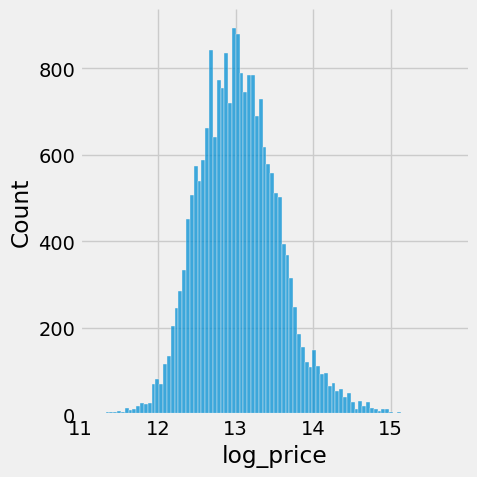

In [31]:
sns.displot(new_df['log_price'])

# Model Building:

In [32]:
# Creating dependent and independent features
X = new_df.drop(columns = ['log_price'])
Y = new_df['log_price']

In [33]:
# spliting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=1)#, random_state=3)

In [34]:
models = {
    'RandomForestRegressor': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'XGBRegressor' : XGBRegressor()    #xgb.XGBRegressor(),
}

### Step 1 Model Training

In [35]:
for model_name, model in models.items():
    #Train the model
    model.fit(X_train, Y_train)
    
    #Score of each model
    y_pred = model.predict(X_test)
    score = r2_score(Y_test, y_pred)
    
    print(f'The Accuracy score of {model_name}: {score:3f}')
    print("-"*65)

The Accuracy score of RandomForestRegressor: 0.884342
-----------------------------------------------------------------
The Accuracy score of LinearRegression: 0.766618
-----------------------------------------------------------------
The Accuracy score of KNeighborsRegressor: 0.535928
-----------------------------------------------------------------
The Accuracy score of GradientBoostingRegressor: 0.875151
-----------------------------------------------------------------
The Accuracy score of XGBRegressor: 0.892558
-----------------------------------------------------------------


In [36]:
dfgdgdg

NameError: name 'dfgdgdg' is not defined

### Models Metric Scores

In [ ]:
for model_name, model in models.items():
    model.fit(X_train, Y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Regression metrics
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)

    print(f'Model: {model_name}')
    print(f'R2 score: {r2:.3f}')
    print(f'Mean Squared Error: {mse:.3f}')
    print(f'Mean Absolute Error: {mae:.3f}')
    print(f'Root Mean Squared Error: {rmse}')
    print("="*60)


Model: RandomForestRegressor
R2 score: 0.884
Mean Squared Error: 0.032
Mean Absolute Error: 0.125
Root Mean Squared Error: 0.17789911817235618
Model: LinearRegression
R2 score: 0.767
Mean Squared Error: 0.064
Mean Absolute Error: 0.194
Root Mean Squared Error: 0.2525830870110347
Model: KNeighborsRegressor
R2 score: 0.536
Mean Squared Error: 0.127
Mean Absolute Error: 0.283
Root Mean Squared Error: 0.35617494009115747
Model: GradientBoostingRegressor
R2 score: 0.875
Mean Squared Error: 0.034
Mean Absolute Error: 0.134
Root Mean Squared Error: 0.1847150105585179
Model: XGBRegressor
R2 score: 0.893
Mean Squared Error: 0.029
Mean Absolute Error: 0.121
Root Mean Squared Error: 0.17137883540253496


# Hyper Perameter Tuning

In [ ]:
dfsdfsdf

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [ ]:
# Define parameter grids
best_models_param = {
    'GradientBoostingRegressor': {
        'n_estimators': np.arange(100, 301, 50),
        'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'XGBRegressor': {
        'n_estimators': np.arange(100, 301, 50),
        'learning_rate': uniform(0.01, 0.1),
        'max_depth': np.arange(3, 10),
        'gamma': uniform(0, 0.5)
    }
}

# Models
two_final_models = {
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor(objective='reg:squarederror')
}

# Initialize KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in two_final_models.items():
    # Initialize RandomizedSearchCV
    randomcv = RandomizedSearchCV(estimator=model,
        param_distributions=best_models_param[name],
        n_iter=10,  
        scoring='r2',  
        n_jobs=-1,  # Use all available cores
        cv=kfold,  
    )
    
    try:
        # Fit the RandomizedSearchCV to the data
        randomcv.fit(X_train, Y_train)
        
        print(f'{name}:')
        print(f"Best parameters: {randomcv.best_params_}")
        print(f'Best Score: {randomcv.best_score_:.4f}')
        print("="*65)
        
    except Exception as e:
        print(f"An error occurred with {name}: {e}")
        print("="*65)


GradientBoostingRegressor:
Best parameters: {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 10, 'loss': 'squared_error'}
Best Score: 0.8905
XGBRegressor:
Best parameters: {'gamma': 0.05234053779053949, 'learning_rate': 0.045798061186176235, 'max_depth': 9, 'n_estimators': 250}
Best Score: 0.8973


In [37]:
# XGBRegressor hyperparameters
XGBR__ = XGBRegressor(
    n_estimators=250,
    max_depth=6,
    learning_rate=0.096,
    gamma=0.029041,
)

# Fitting and prediction 
XGBR__.fit(X_train, Y_train)
XGBR_pred = XGBR__.predict(X_test)

# R^2 score, cross-validation and Mean Squared Error
XGBR_R2 = r2_score(Y_test, XGBR_pred)
XGBR_MSE = mean_squared_error(Y_test, XGBR_pred)
cross_val_score_mean = np.mean(cross_val_score(XGBR__, X, Y, cv=5, scoring='r2'))

print('Model: XGBRegressor')
print(f'The R^2 score: {XGBR_R2:.4f}')
print(f'Cross-Validation score: {cross_val_score_mean:.4f}')
print(f'Mean Squared Error: {XGBR_MSE:.4f}')

Model: XGBRegressor
The R^2 score: 0.8975
Cross-Validation score: 0.9003
Mean Squared Error: 0.0280


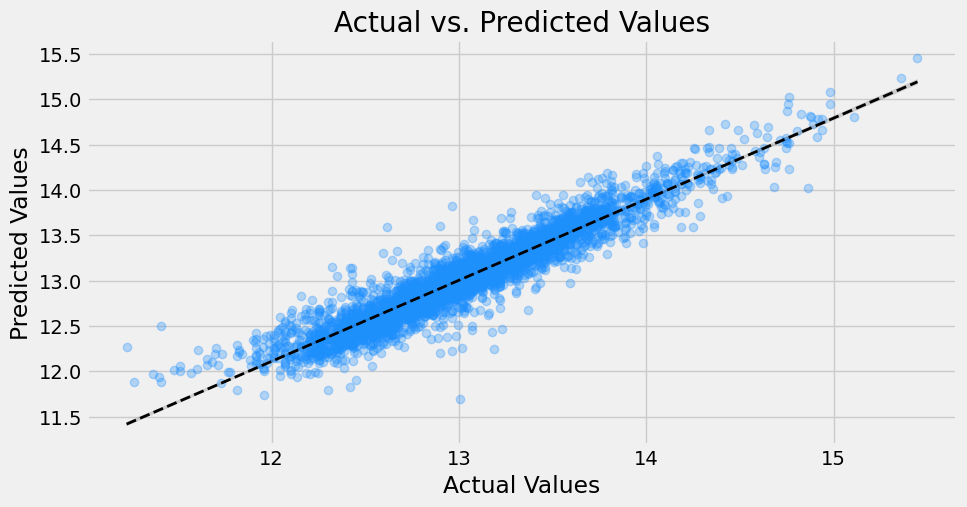

In [ ]:
plt.figure(figsize=(10, 5))

# regplot with customized line
sns.regplot(
    x=Y_test, 
    y=XGBR_pred, 
    color='dodgerblue',  
    line_kws={
        'color': 'k',       
        'linewidth': 2,
        'linestyle': '--'   
    },
    scatter_kws={'alpha': 0.3}
)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


### Highly corelated columns to XGBR__ model

In [38]:
# Highly corelated columns to XGBR__ model 
feature_importances = XGBR__.feature_importances_

# Combine feature names with their importances
feature_importance_df = pd.DataFrame({
    'Feature': new_df.drop(columns='log_price').columns,  # Replace 'price' with your target column
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


          Feature  Importance
8           grade    0.548072
2     sqft_living    0.152214
13            lat    0.120895
6            view    0.036563
5      waterfront    0.033201
15  sqft_living15    0.022947
14           long    0.019950
7       condition    0.013366
11       yr_built    0.012825
9      sqft_above    0.010401
3        sqft_lot    0.009020
12   yr_renovated    0.008286
1       bathrooms    0.003535
10  sqft_basement    0.003201
4          floors    0.003149
0        bedrooms    0.002374


### Train the model with 10 most important features

In [40]:
unnessarray_columns = [ 'sqft_above', 
                        'bathrooms',
                        'yr_renovated',
                        'floors',
                        'sqft_basement',
    ]

new_df.drop(columns=unnessarray_columns, inplace=True)

KeyError: "['sqft_above', 'bathrooms', 'yr_renovated', 'floors', 'sqft_basement'] not found in axis"

In [42]:


x = new_df.drop(columns = 'log_price',)

y = new_df['log_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=1)#, random_state=3)

In [43]:
# XGBRegressor hyperparameters
XGBR__new = XGBRegressor(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.096,
    gamma=0.029041,
)

# Fitting and prediction 
XGBR__new.fit(x_train, y_train)
XGBR_pred_try = XGBR__new.predict(x_test)

# R^2 score, cross-validation and Mean Squared Error
XGBR_R2_try = r2_score(y_test, XGBR_pred_try)
XGBR_MSE_try = mean_squared_error(y_test, XGBR_pred_try)
cross_val_score_mean_tryy = np.mean(cross_val_score(XGBR__new, x, y, cv=5, scoring='r2'))

print('Model: XGBRegressor')
print(f'The R^2 score: {XGBR_R2_try:.4f}')
print(f'Cross-Validation R^2 score: {cross_val_score_mean_tryy:.4f}')
print(f'Mean Squared Error: {XGBR_MSE_try:.4f}')

Model: XGBRegressor
The R^2 score: 0.8949
Cross-Validation R^2 score: 0.8974
Mean Squared Error: 0.0287


## Save The Model in Pickle format

In [ ]:
import pickle 

In [ ]:
# To save the model in pickle format
with open('XGBR__model.pkl', 'wb') as file:
    pickle.dump(XGBR__new, file)

In [ ]:
# To save the data in pickle format
with open('Home_prices_data.pkl', 'wb') as file:
    pickle.dump(new_df, file)

In [2]:
import pandas as pd

In [4]:
user_input = {
        'bedrooms': [3],
        'sqft_living': [4],
        'sqft_lot': [5],
        'waterfront': [6],
        'view': ['view'],
        'condition': ['555555'],
        'grade': ['jdfljdlfj'],
        'yr_built': [55],
        'lat': ['fsdfsdf'],
        'long': ['fsdfsdfsdf'],
        'sqft_living15': [411111]
        } 

pd.DataFrame(user_input)

,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built,lat,long,sqft_living15
0,3,4,5,6,view,555555,jdfljdlfj,55,fsdfsdf,fsdfsdfsdf,411111


In [102]:
input = [{
        'bedrooms': 3,
        'sqft_living': 2500,
        'sqft_lot': 3000,
        'waterfront': 1,
        'view': 4,
        'condition': 3,
        'grade': 8,
        'yr_built': 1920,
        'lat': 47.1559,
        'long': -122.519,
        'sqft_living15': 2300
        }]


pd.DataFrame(input)

,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built,lat,long,sqft_living15
0,3,2500,3000,1,4,3,8,1920,47.1559,-122.519,2300


In [5]:
input = {
        'bedrooms': 3,
        'sqft_living': 2500,
        'sqft_lot': 3000,
        'waterfront': 1,
        'view': 4,
        'condition': 3,
        'grade': 8,
        'yr_built': 1920,
        'lat': 47.1559,
        'long': -122.519,
        'sqft_living15': 2300
        }


pd.DataFrame([input])

,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built,lat,long,sqft_living15
0,3,2500,3000,1,4,3,8,1920,47.1559,-122.519,2300


In [108]:
mm = (0,290,7613,0,0,1,1,1900,47.1559,-122.519,399)


gg = pd.DataFrame(mm)

gg

,0
0,0.0000
1,290.0000
2,7613.0000
3,0.0000
4,0.0000
5,1.0000
6,1.0000
7,1900.0000
8,47.1559
9,-122.5190


In [90]:
coll =new_df.columns.drop('log_price')

In [94]:
mm = (0,290,7613,0,0,1,1,1900,47.1559,-122.519,399)


gg = pd.DataFrame([mm], columns=coll)

gg

,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built,lat,long,sqft_living15
0,0,290,7613,0,0,1,1,1900,47.1559,-122.519,399


In [ ]:
def load_model():
    try:
        with open('XGBR__model.pkl', 'rb') as file:
            model = pickle.load(file)
            return model
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None

mo = load_model()



mo.predict(gg)

array([12.426628], dtype=float32)